In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
wine=pd.read_csv("C:/Users/pal/Desktop/projects/project_1/dataset/winequality_red.csv", ";")

In [3]:
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine.columns=wine.columns.str.replace(' ', '_')

In [6]:
wine.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [7]:
c = wine.corr()['quality'].drop('quality')
correlation = c.sort_values(kind="quicksort")
correlation

volatile_acidity       -0.390558
total_sulfur_dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free_sulfur_dioxide    -0.050656
residual_sugar          0.013732
fixed_acidity           0.124052
citric_acid             0.226373
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

<Figure size 720x720 with 0 Axes>

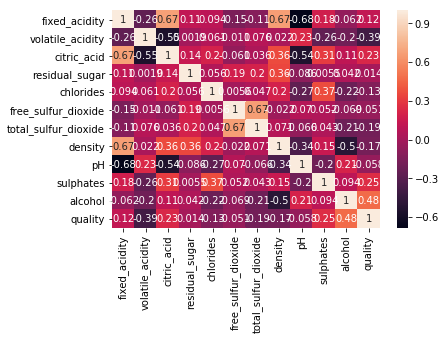

<Figure size 720x720 with 0 Axes>

In [8]:
sb.heatmap(wine.corr(),color = "k", annot=True)
plt.figure(figsize=(10,10))

correlation analysis shows feature alcohol is most positive correlated feature to target(quality)whereas volatile_acidity is most negalive correlated feature

(<matplotlib.axes._subplots.AxesSubplot at 0xf992bf0>,)

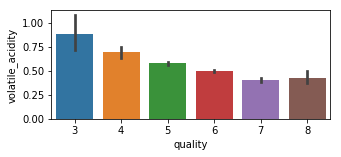

In [9]:
plt.figure(figsize=(5,2)), 
sb.barplot(x="quality", y="volatile_acidity",  data=wine ), 


<Figure size 360x144 with 0 Axes>

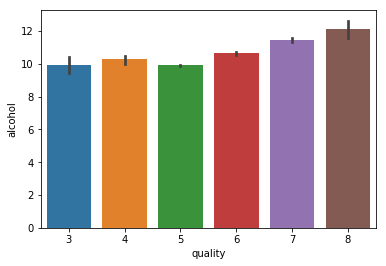

<Figure size 360x144 with 0 Axes>

In [10]:
sb.barplot(x="quality", y="alcohol",   data=wine)
plt.figure(figsize=(5,2))

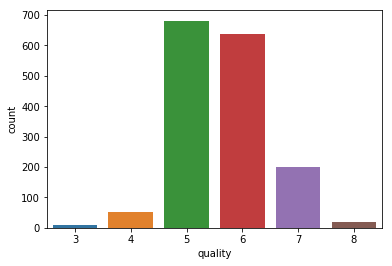

In [11]:
sb.countplot(x='quality', data=wine)

In [12]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


we can also convert this problem to classification problem.For that will create a new column called Score. This column will contain the values of 1,2,3 and 4. 
1 - Bad
2 - Average
3-  good
4 - Excellent
This will be split in the following way. 
1,2,3 = Bad
4,5 = Average
6,7,8 =good
9,10= excellent

In [14]:
score = []
for i in wine['quality']:
    if  i <= 3:
       score.append('1')
    elif i >= 4 and i <= 5:
        score.append('2')
    elif i >= 6 and i <= 8:
        score.append('3')
    elif i >= 9 and i <= 10:
        score.append('4')
wine['score'] = score

In [15]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [17]:
lig=LinearRegression()
log=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
ss=StandardScaler()

In [18]:
X = wine.iloc[:,:11].values
y = wine.iloc[:,-2].values

In [19]:
X= ss.fit_transform(X)

In [20]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

# LinearRegression


In [23]:
lig.fit(X_train,y_train)
y_pred= lig.predict(X_test)
lig.score(X_test,y_test)

0.3069851530548914

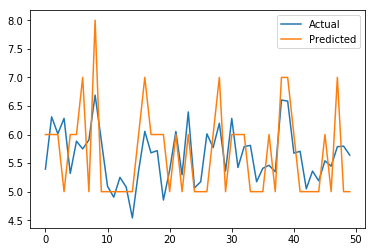

In [24]:
comp = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
comp = comp.reset_index()
comp = comp.drop(['index'],axis=1)
plt.plot(comp[:50])
plt.legend(['Actual','Predicted'])

In [25]:
comp

,Predicted,Actual
0,5.394274,6
1,6.309171,6
2,6.012424,6
3,6.282940,5
4,5.319536,6
5,5.884103,6
6,5.748527,7
7,5.904358,5
8,6.689595,8
9,5.894512,5


# LogisticRegression


In [26]:
y = wine.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))


C:\Users\pal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.67      0.70      0.68       182
           3       0.74      0.71      0.73       214

   micro avg       0.70      0.70      0.70       400
   macro avg       0.47      0.47      0.47       400
weighted avg       0.70      0.70      0.70       400



C:\Users\pal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
log_conf_matrix = confusion_matrix(y_test, y_pred)
log_acc_score = accuracy_score(y_test, y_pred)
print("confusion_matrix",  log_conf_matrix)
print("accuracy_score", log_acc_score*100)


confusion_matrix [[  0   3   1]
 [  0 128  54]
 [  0  61 153]]
accuracy_score 70.25


In [28]:
comp = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
comp = comp.reset_index()
comp = comp.drop(['index'],axis=1)
comp

,Predicted,Actual
0,3,2
1,3,3
2,2,2
3,3,2
4,2,2
5,3,2
6,2,2
7,2,2
8,2,2
9,2,3


# DecisionTreeClassifier


In [29]:
dt.fit(X_train,y_train)
predicted_dt = dt.predict(X_test)
print(classification_report(y_test, predicted_dt))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.70      0.76      0.73       182
           3       0.78      0.75      0.77       214

   micro avg       0.74      0.74      0.74       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.74      0.74      0.74       400



C:\Users\pal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
dt_conf_matrix = confusion_matrix(y_test, predicted_dt)
dt_acc_score = accuracy_score(y_test, predicted_dt)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[  0   4   0]
 [  0 138  44]
 [  0  54 160]]
74.5


In [31]:
comp = pd.DataFrame({'Predicted':predicted_dt,'Actual':y_test})
comp = comp.reset_index()
comp = comp.drop(['index'],axis=1)
comp

,Predicted,Actual
0,2,2
1,3,3
2,2,2
3,2,2
4,2,2
5,3,2
6,2,2
7,2,2
8,2,2
9,2,3


# GaussianNB

In [32]:
gnb.fit(X_train,y_train)
predicted_gnb = gnb.predict(X_test)
print(classification_report(y_test, predicted_gnb))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.69      0.65      0.67       182
           3       0.73      0.77      0.75       214

   micro avg       0.70      0.70      0.70       400
   macro avg       0.47      0.47      0.47       400
weighted avg       0.70      0.70      0.70       400



In [33]:
gnb_conf_matrix = confusion_matrix(y_test, predicted_gnb)
gnb_acc_score = accuracy_score(y_test, predicted_gnb)
print(gnb_conf_matrix)
print(gnb_acc_score*100)


[[  0   4   0]
 [  2 118  62]
 [  0  50 164]]
70.5


In [34]:
comp = pd.DataFrame({'Predicted':predicted_gnb,'Actual':y_test})
comp = comp.reset_index()
comp = comp.drop(['index'],axis=1)
comp

,Predicted,Actual
0,3,2
1,3,3
2,2,2
3,3,2
4,2,2
5,3,2
6,2,2
7,2,2
8,2,2
9,2,3
